#    Dataset Introduction
The Crime Review for the Month of July 2024 dataset provides a statistical analysis of crime incidents, categorized under various major and minor heads. It tracks the number of reported cases across different crime types, including murder, property disputes, and personal vendettas, along with their comparative statistics from the previous month and the corresponding period in the previous year. The dataset contains 689 entries with 14 columns, recording crime trends and patterns over time. While the primary focus is on tracking crime rates, some columns contain missing or irrelevant data. This dataset serves as a valuable resource for understanding crime trends, aiding law enforcement agencies and policymakers in making informed decisions for crime prevention and public safety.


#  Dataset Description:
The Crime Review for the Month of July 2024 dataset provides a detailed statistical analysis of crime incidents, categorizing them under major and minor heads. With 689 records and 14 columns, it tracks various crime types, including murder, property disputes, and personal vendettas, along with their causes. The dataset records the number of incidents reported during the current month, the previous month, and the same period in the previous year, helping identify crime trends over time. Key classifications include major heads, such as Murder (Sec. 302/303 IPC), and minor heads, which further specify motives like property disputes, personal enmity, or dowry-related crimes. This dataset serves as a valuable resource for law enforcement agencies and policymakers, assisting in crime pattern analysis and decision-making for public safety. However, some columns contain missing or potentially irrelevant data, requiring preprocessing for accurate insights.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r"C:\Users\manoj\Downloads\CRIME_REVIEW_FOR_THE_MONTH_OF_JULY_2024_1.csv")


print(df.head())


   Sl.No. Heads of Crime               Major Heads  \
0       1  A - IPC Crime  Murder (Sec.302/303 IPC)   
1       2  A - IPC Crime  Murder (Sec.302/303 IPC)   
2       3  A - IPC Crime  Murder (Sec.302/303 IPC)   
3       4  A - IPC Crime  Murder (Sec.302/303 IPC)   
4       5  A - IPC Crime  Murder (Sec.302/303 IPC)   

                           Minor Heads  \
0                             For gain   
1                Over Property Dispute   
2  Due to Personal Vendetta or enemity   
3               Due to Sexual jealousy   
4                 For dowry by burning   

   During the current year upto the end of month under review  \
0                                               24.0            
1                                               18.0            
2                                               18.0            
3                                               13.0            
4                                                0.0            

   During the corresponding mon

In [2]:
df.head(5)

,Sl.No.,Heads of Crime,Major Heads,Minor Heads,During the current year upto the end of month under review,During the corresponding month of previous year,During the previous month,During the current month,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,1,A - IPC Crime,Murder (Sec.302/303 IPC),For gain,24.0,2.0,1.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2,A - IPC Crime,Murder (Sec.302/303 IPC),Over Property Dispute,18.0,3.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2,3,A - IPC Crime,Murder (Sec.302/303 IPC),Due to Personal Vendetta or enemity,18.0,3.0,4.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,4,A - IPC Crime,Murder (Sec.302/303 IPC),Due to Sexual jealousy,13.0,3.0,5.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
4,5,A - IPC Crime,Murder (Sec.302/303 IPC),For dowry by burning,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


#  Frist five data from dataset

In [14]:
print(df.columns)

Index(['Sl.No.', 'Heads of Crime', 'Major Heads', 'Minor Heads',
       'During the current year upto the end of month under review',
       'During the corresponding month of previous year',
       'During the previous month', 'During the current month', 'Unnamed: 8',
       'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12',
       'Unnamed: 13'],
      dtype='object')


#  No of columns in our dataset

In [17]:
print(df.sample(10)) 


     Sl_No                Crime_Type  \
184    185             A - IPC Crime   
74      75             A - IPC Crime   
336    337             A - IPC Crime   
230    231             A - IPC Crime   
32      33             A - IPC Crime   
623    624  B - SPECIAL & LOCAL LAWS   
41      42             A - IPC Crime   
343    344             A - IPC Crime   
453    454             A - IPC Crime   
118    119             A - IPC Crime   

                                           Major_Heads  \
184                         THEFT (Sec.379 to 389 IPC)   
74   ATTEMPT TO CULPABLE HOMICIDE NOT AMOUNTING TO ...   
336  DEATHS DUE TO RASHNESS/NEGLIGENCE (Sec.304(A) ...   
230            ADULTERATION (Sec. 272, 273 to 276 IPC)   
32                    ATTEMPT TO MURDER (Sec. 307 IPC)   
623                         KARNATAKA STATE LOCAL ACTS   
41                    ATTEMPT TO MURDER (Sec. 307 IPC)   
343  DEATHS DUE TO RASHNESS/NEGLIGENCE (Sec.304(A) ...   
453                        UNNATURAL 

In [16]:
df = df.iloc[:, :8]
df.columns = ["Sl_No", "Crime_Type", "Major_Heads", "Minor_Heads", 
          "Current_Year_Upto_Review", "Previous_Year_Same_Month", 
              "Previous_Month", "Current_Month"]

In [3]:
df = df.dropna(subset=["Current_Year_Upto_Review", "Previous_Year_Same_Month", "Previous_Month", "Current_Month"])

In [4]:
# Convert numeric columns to integers
num_cols = ["Current_Year_Upto_Review", "Previous_Year_Same_Month", "Previous_Month", "Current_Month"]
df[num_cols] = df[num_cols].astype(int)

In [5]:
# Aggregate by major crime category
crime_summary = df.groupby("Major_Heads")[num_cols].sum().reset_index()

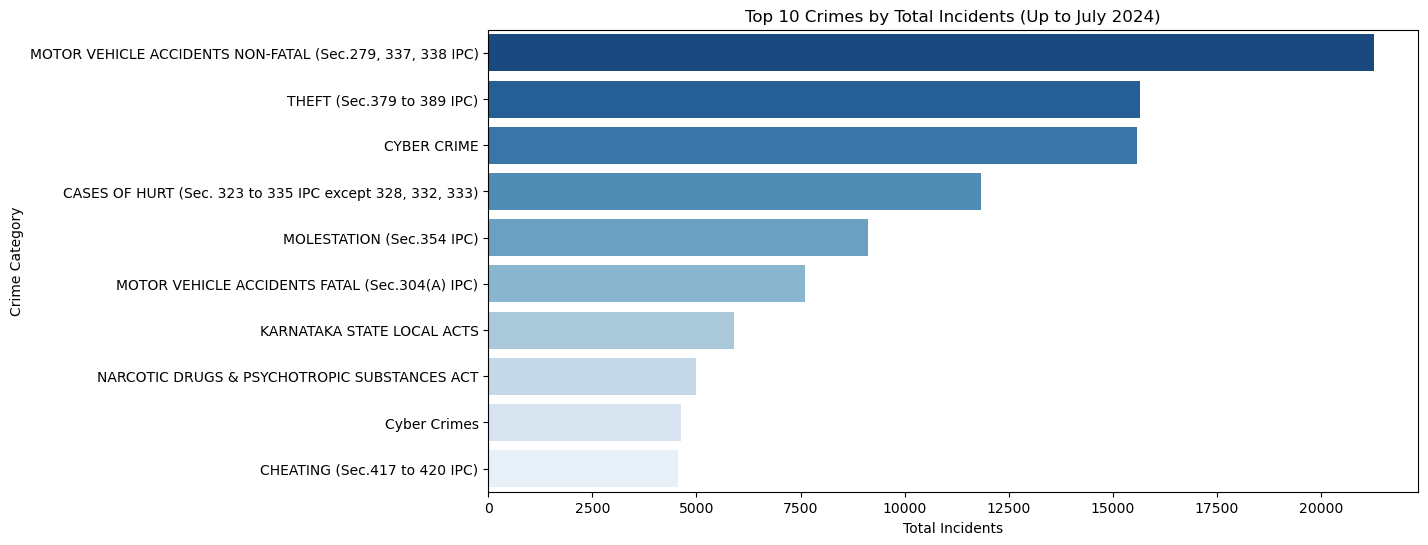

In [6]:
top_crimes = crime_summary.sort_values(by="Current_Year_Upto_Review", ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_crimes["Current_Year_Upto_Review"], y=top_crimes["Major_Heads"], palette="Blues_r")
plt.title("Top 10 Crimes by Total Incidents (Up to July 2024)")
plt.xlabel("Total Incidents")
plt.ylabel("Crime Category")
plt.show()

# Top 10 Crimes by Total Incidents (Up to July 2024)

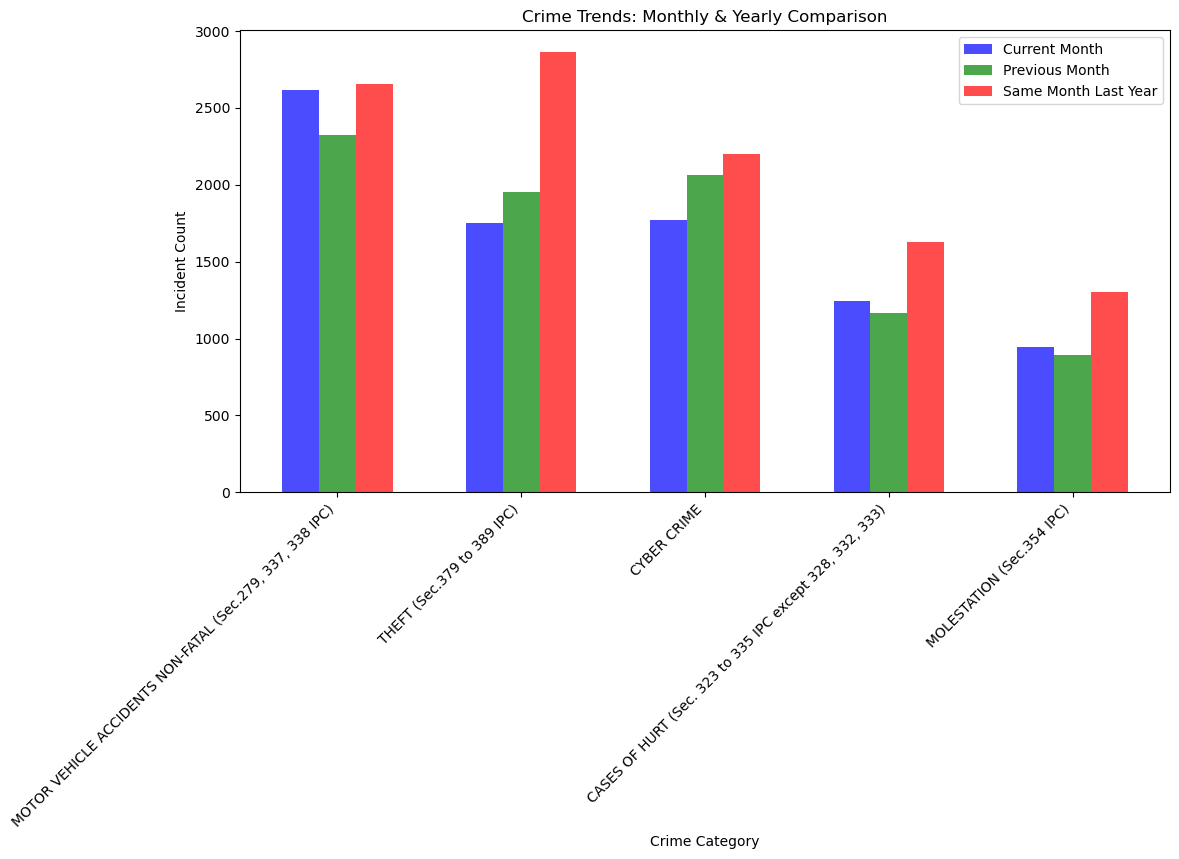

In [7]:
top_5_crimes = crime_summary.sort_values(by="Current_Year_Upto_Review", ascending=False).head(5)

plt.figure(figsize=(12, 6))
bar_width = 0.2
x = range(len(top_5_crimes["Major_Heads"]))

plt.bar(x, top_5_crimes["Current_Month"], width=bar_width, label="Current Month", color="b", alpha=0.7)
plt.bar([p + bar_width for p in x], top_5_crimes["Previous_Month"], width=bar_width, label="Previous Month", color="g", alpha=0.7)
plt.bar([p + 2 * bar_width for p in x], top_5_crimes["Previous_Year_Same_Month"], width=bar_width, label="Same Month Last Year", color="r", alpha=0.7)

plt.xticks([p + bar_width for p in x], top_5_crimes["Major_Heads"], rotation=45, ha="right")
plt.xlabel("Crime Category")
plt.ylabel("Incident Count")
plt.title("Crime Trends: Monthly & Yearly Comparison")
plt.legend()
plt.show()

# Crime Trends Monthly & Yearly Comparison

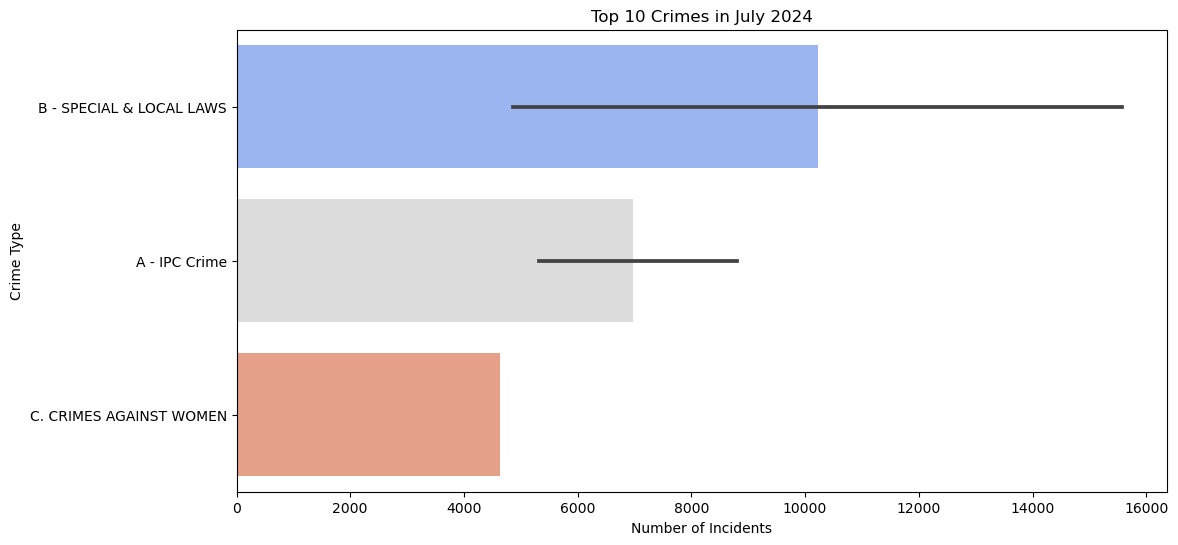

In [18]:
df['Current_Year_Upto_Review'] = pd.to_numeric(df['Current_Year_Upto_Review'], errors='coerce')

# Select top 10 most reported crimes
top_10_crimes = df.nlargest(10, 'Current_Year_Upto_Review')

# Bar Plot
plt.figure(figsize=(12, 6))
sns.barplot(x="Current_Year_Upto_Review", y="Crime_Type", data=top_10_crimes, palette="coolwarm")
plt.title("Top 10 Crimes in July 2024")
plt.xlabel("Number of Incidents")
plt.ylabel("Crime Type")
plt.show()

 # Top 10 Crimes in July 2024

C:\Users\manoj\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


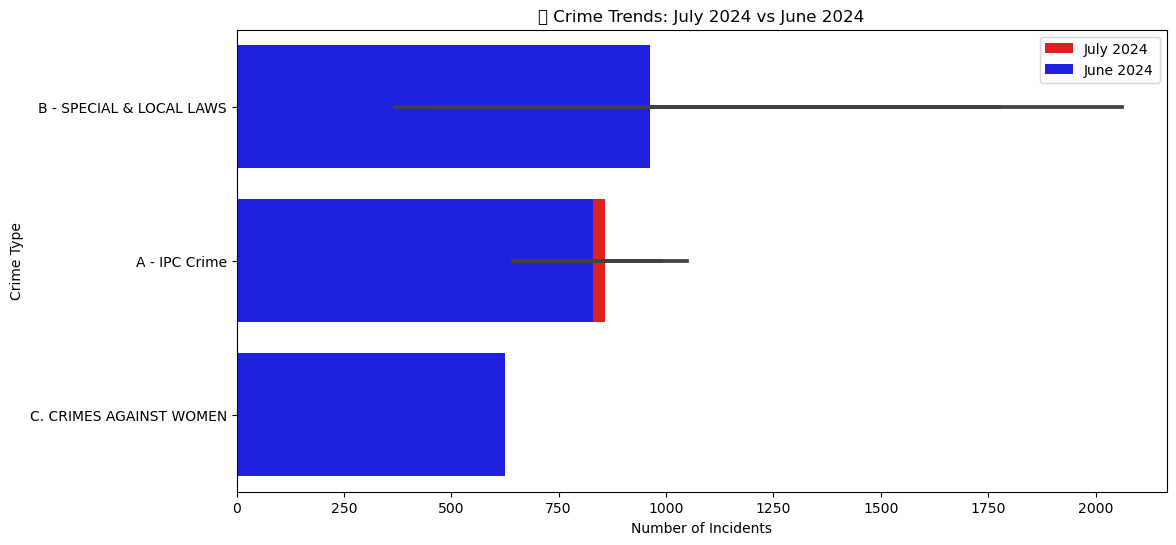

In [12]:
# Convert columns to numeric
df['Previous_Month'] = pd.to_numeric(df['Previous_Month'], errors='coerce')
df['Current_Month'] = pd.to_numeric(df['Current_Month'], errors='coerce')

# Select top 10 crimes based on current month
top_crimes = df.nlargest(10, 'Current_Month')

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x="Current_Month", y="Crime_Type", data=top_crimes, color='red', label="July 2024")
sns.barplot(x="Previous_Month", y="Crime_Type", data=top_crimes, color='blue', label="June 2024")

plt.title(" Crime Trends: July 2024 vs June 2024")
plt.xlabel("Number of Incidents")
plt.ylabel("Crime Type")
plt.legend()
plt.show()


# Crime Trends: July 2024 vs June 2024

C:\Users\manoj\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


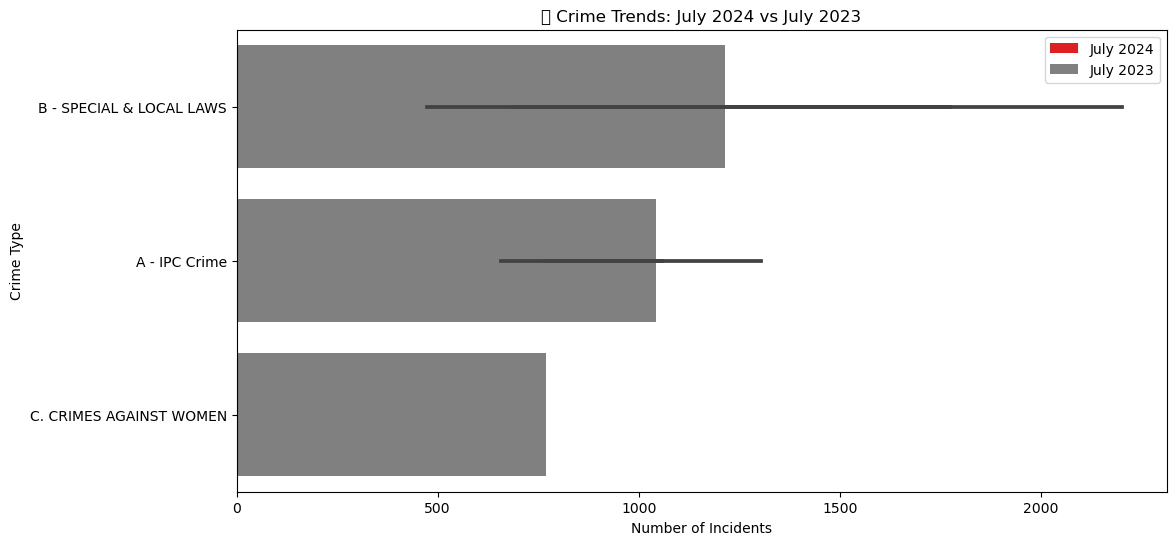

In [13]:
# Convert to numeric
df['Previous_Year_Same_Month'] = pd.to_numeric(df['Previous_Year_Same_Month'], errors='coerce')

# Select top 10 crimes for comparison
top_crimes_yearly = df.nlargest(10, 'Current_Month')

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x="Current_Month", y="Crime_Type", data=top_crimes_yearly, color='red', label="July 2024")
sns.barplot(x="Previous_Year_Same_Month", y="Crime_Type", data=top_crimes_yearly, color='gray', label="July 2023")

plt.title(" Crime Trends: July 2024 vs July 2023")
plt.xlabel("Number of Incidents")
plt.ylabel("Crime Type")
plt.legend()
plt.show()


# Crime Trends: July 2024 vs July 2023

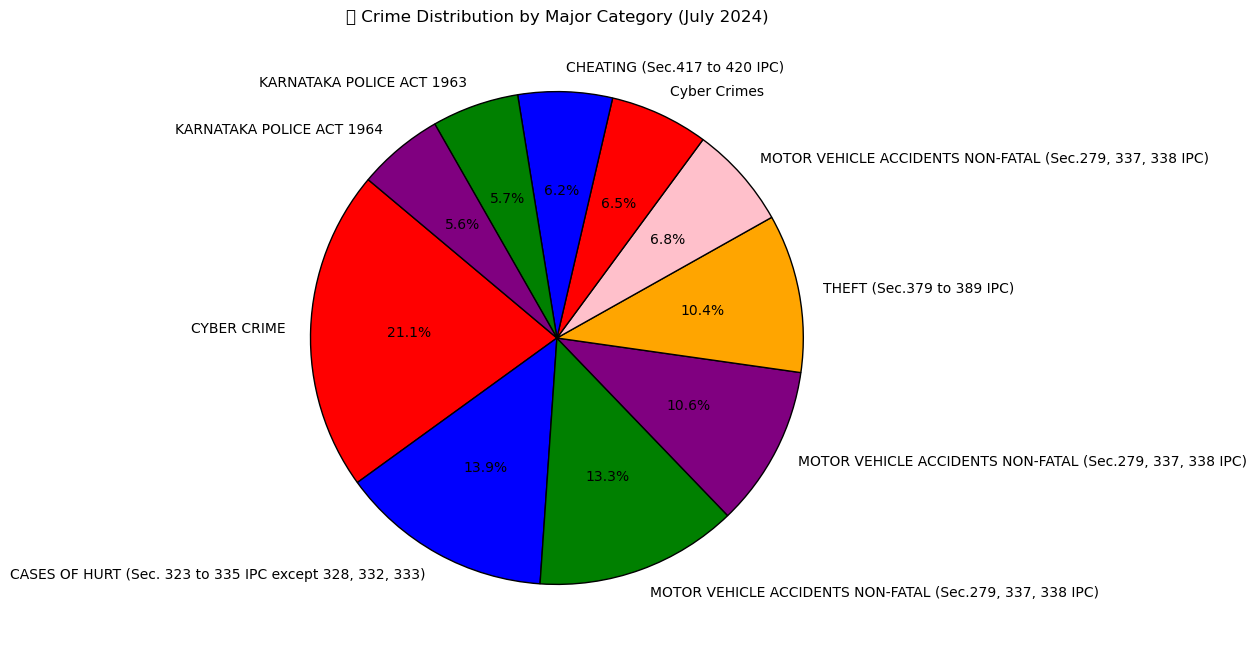

In [16]:
plt.figure(figsize=(8, 8))
plt.pie(
    top_crimes['Current_Month'], 
    labels=top_crimes['Major_Heads'], 
    autopct='%1.1f%%', 
    colors=['red', 'blue', 'green', 'purple', 'orange', 'pink'],
    startangle=140, 
    wedgeprops={'edgecolor': 'black'}
)
plt.title("Crime Distribution by Major Category (July 2024)")
plt.show()

# Crime Distribution by Major Category (July 2024)

C:\Users\manoj\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128992 (\N{LARGE ORANGE CIRCLE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


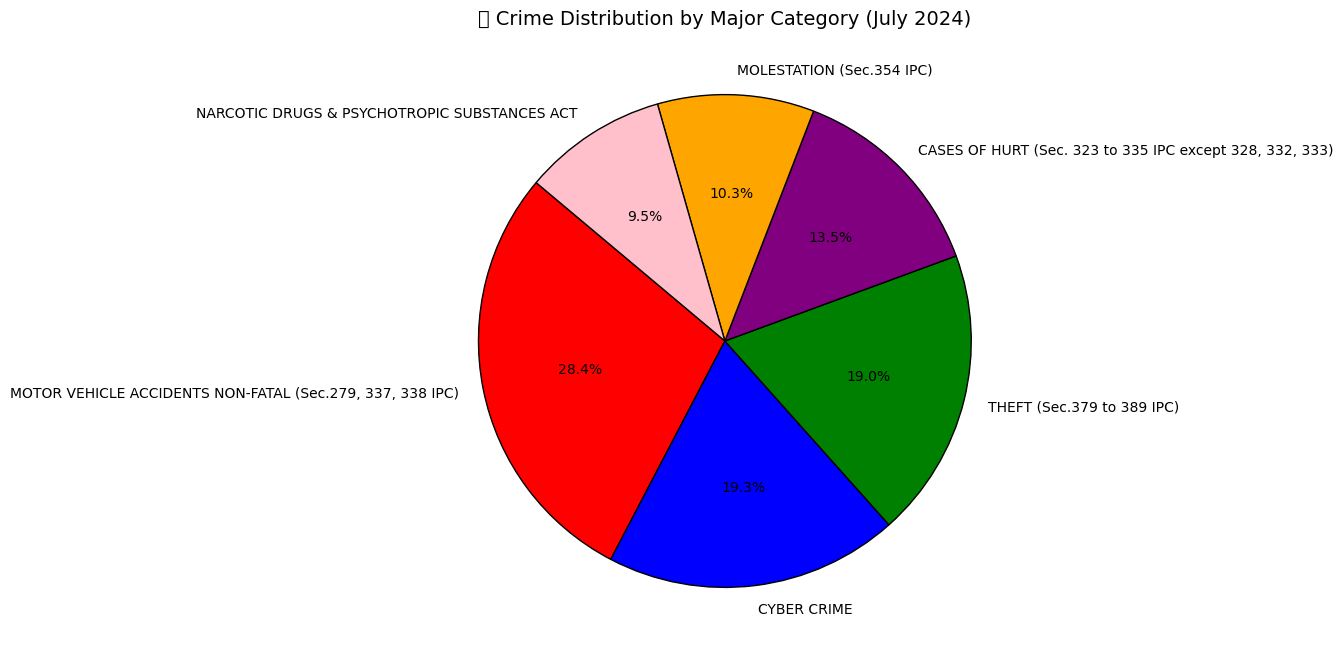

In [18]:
top_crimes = crime_summary.nlargest(6, 'Current_Month')

# Define colors
colors = ['red', 'blue', 'green', 'purple', 'orange', 'pink']

# Create Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(
    top_crimes['Current_Month'], 
    labels=top_crimes['Major_Heads'], 
    autopct='%1.1f%%', 
    colors=colors, 
    startangle=140, 
    wedgeprops={'edgecolor': 'black'}
)
plt.title(" Crime Distribution by Major Category (July 2024)", fontsize=14)
plt.show()

C:\Users\manoj\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


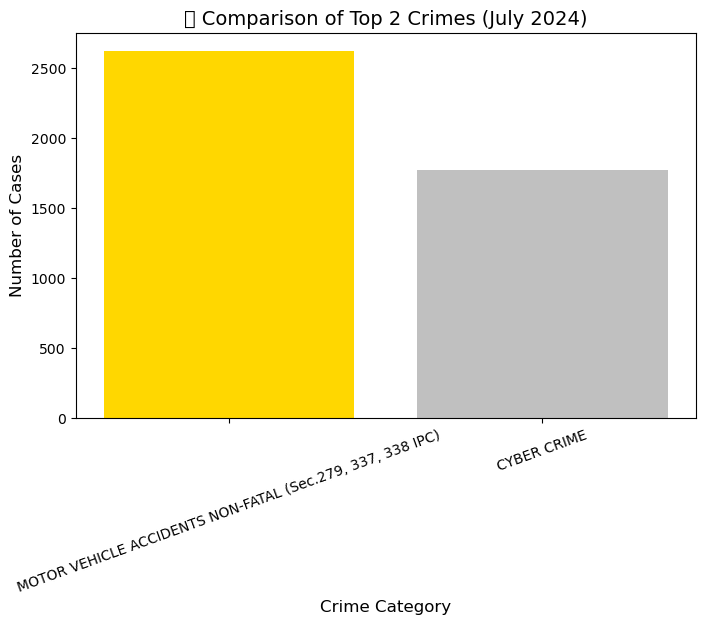

In [20]:
# Convert column to numeric
df['Current_Month'] = pd.to_numeric(df['Current_Month'], errors='coerce')

# Group by major crime category and sum incidents
crime_summary = df.groupby('Major_Heads')['Current_Month'].sum().reset_index()

# Select top 2 crime categories
top_2_crimes = crime_summary.nlargest(2, 'Current_Month')

# Create bar chart
plt.figure(figsize=(8, 5))
plt.bar(top_2_crimes['Major_Heads'], top_2_crimes['Current_Month'], color=['gold', 'silver'])

# Add labels and title
plt.xlabel("Crime Category", fontsize=12)
plt.ylabel("Number of Cases", fontsize=12)
plt.title(" Comparison of Top 2 Crimes (July 2024)", fontsize=14)
plt.xticks(rotation=20)  # Rotate labels for better readability

# Show plot
plt.show()


#  Comparison of Top 2 Crimes (July 2024)

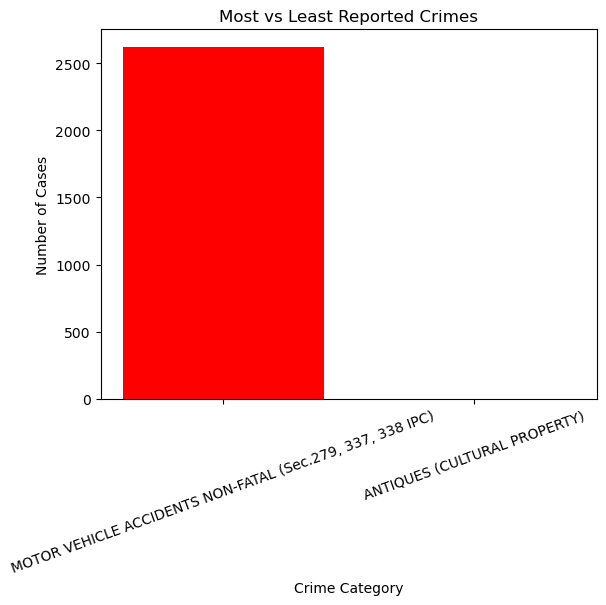

In [22]:
crime_summary = df.groupby('Major_Heads')['Current_Month'].sum()
top_crime = crime_summary.nlargest(1)
least_crime = crime_summary.nsmallest(1)

plt.bar([top_crime.index[0], least_crime.index[0]], [top_crime.values[0], least_crime.values[0]], color=['red', 'green'])
plt.xlabel("Crime Category")
plt.ylabel("Number of Cases")
plt.title("Most vs Least Reported Crimes")
plt.xticks(rotation=20)
plt.show()

# Most vs Least Reported Crimes

C:\Users\manoj\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128660 (\N{ONCOMING POLICE CAR}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


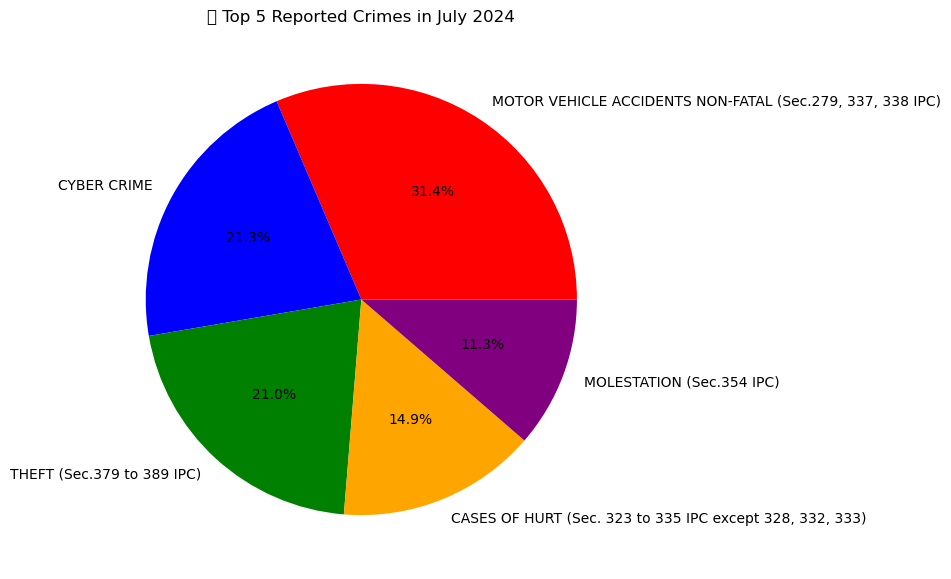

In [23]:
crime_summary = df.groupby('Major_Heads')['Current_Month'].sum().nlargest(5)

# Plot pie chart
plt.figure(figsize=(7, 7))
plt.pie(crime_summary, labels=crime_summary.index, autopct='%1.1f%%', colors=['red', 'blue', 'green', 'orange', 'purple'])
plt.title(" Top 5 Reported Crimes in July 2024")
plt.show()

# Top 5 Reported Crimes in July 2024

C:\Users\manoj\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128660 (\N{ONCOMING POLICE CAR}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


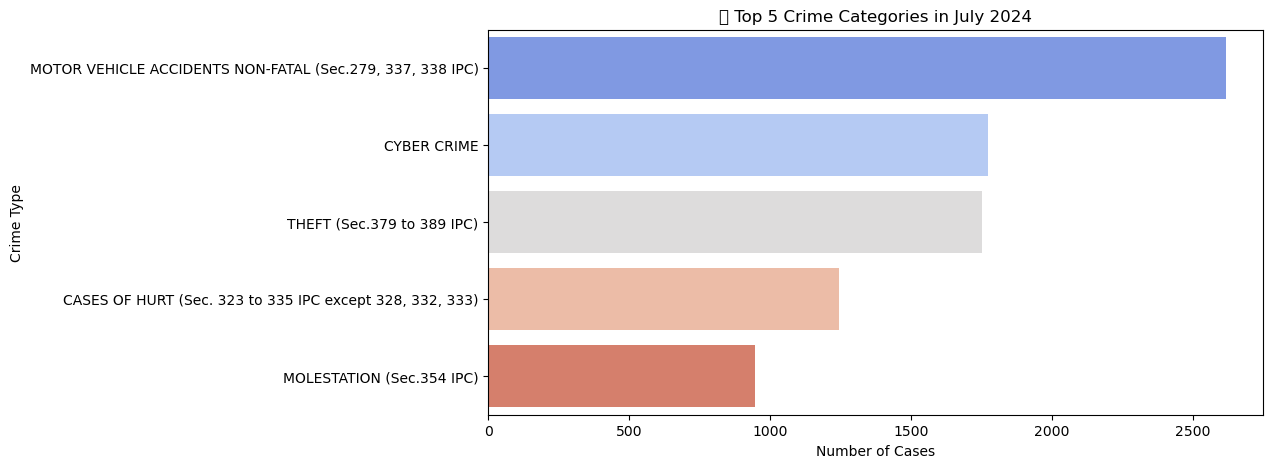

In [24]:
# Group by Major_Heads and sum the crimes
crime_summary = df.groupby('Major_Heads')['Current_Month'].sum().nlargest(5).reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(x="Current_Month", y="Major_Heads", data=crime_summary, palette="coolwarm")
plt.title("Top 5 Crime Categories in July 2024")
plt.xlabel("Number of Cases")
plt.ylabel("Crime Type")
plt.show()


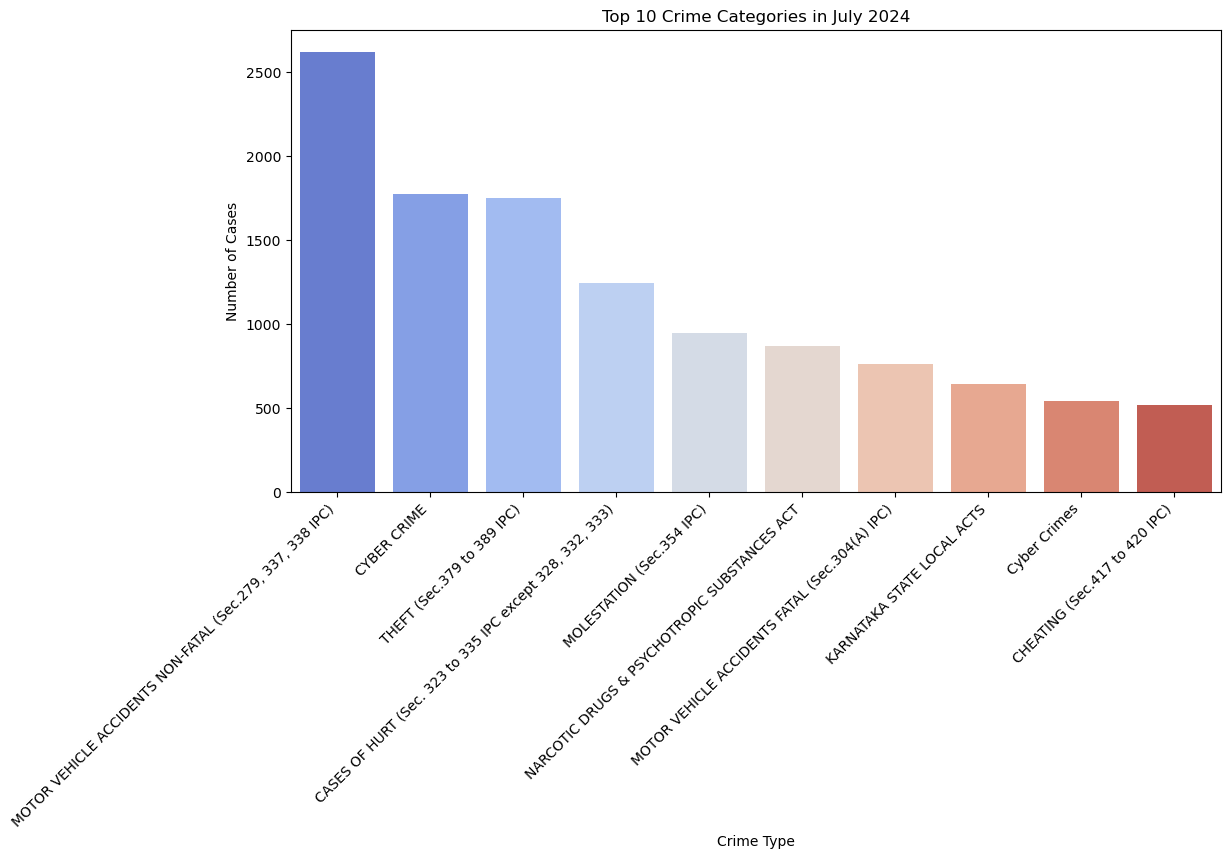

In [27]:
top_10 = df.groupby("Major_Heads")["Current_Month"].sum().nlargest(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_10.index, y=top_10.values, palette="coolwarm")

plt.title("Top 10 Crime Categories in July 2024")
plt.xlabel("Crime Type")
plt.ylabel("Number of Cases")
plt.xticks(rotation=45, ha='right')  # Rotate labels
plt.show()


# Top 10 Crime Categories in July

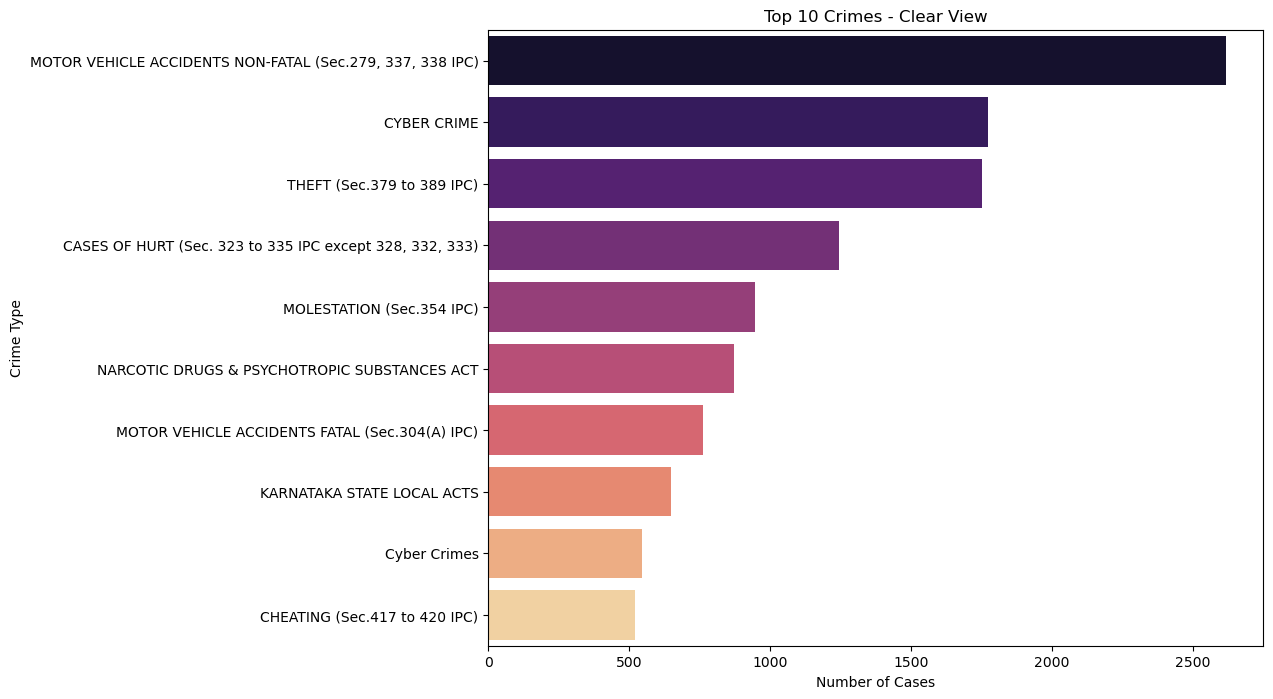

In [28]:
plt.figure(figsize=(10, 8))
sns.barplot(y=top_10.index, x=top_10.values, palette="magma")

plt.title("Top 10 Crimes - Clear View")
plt.xlabel("Number of Cases")
plt.ylabel("Crime Type")
plt.show()


# Top 10 Crimes - Clear View

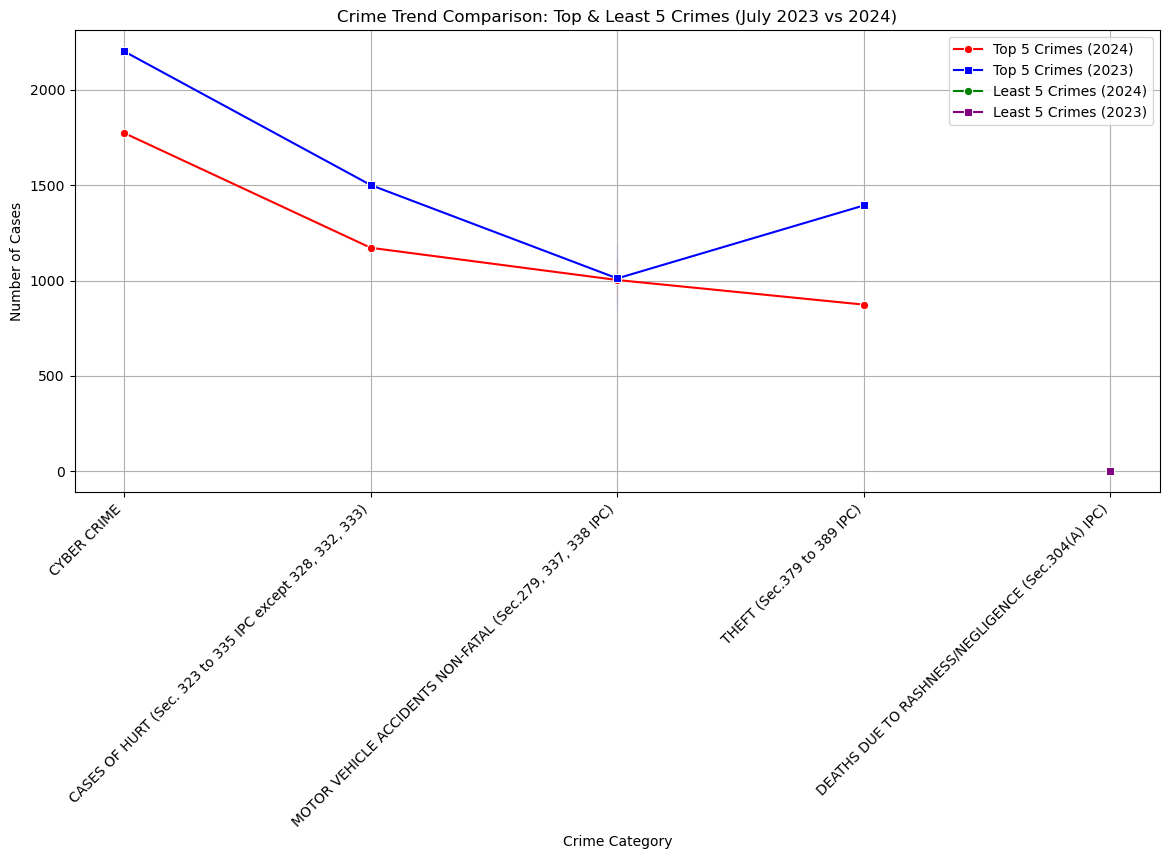

In [30]:
# Extracting top 5 and least 5 crimes
top_5_crimes = df_sorted.head(5)
least_5_crimes = df_sorted.tail(5)

plt.figure(figsize=(14, 6))

# Line plot for top 5 crimes
sns.lineplot(x=top_5_crimes["Major_Heads"], y=top_5_crimes["Current_Month"], marker="o", label="Top 5 Crimes (2024)", color="red")
sns.lineplot(x=top_5_crimes["Major_Heads"], y=top_5_crimes["Previous_Year_Same_Month"], marker="s", label="Top 5 Crimes (2023)", color="blue")

# Line plot for least 5 crimes
sns.lineplot(x=least_5_crimes["Major_Heads"], y=least_5_crimes["Current_Month"], marker="o", label="Least 5 Crimes (2024)", color="green")
sns.lineplot(x=least_5_crimes["Major_Heads"], y=least_5_crimes["Previous_Year_Same_Month"], marker="s", label="Least 5 Crimes (2023)", color="purple")

plt.title("Crime Trend Comparison: Top & Least 5 Crimes (July 2023 vs 2024)")
plt.xlabel("Crime Category")
plt.ylabel("Number of Cases")
plt.xticks(rotation=45, ha="right")
plt.legend()
plt.grid(True)

plt.show()

# Crime Trend Comparison: Top & Least 5 Crimes (July 2023 vs 2024)

C:\Users\manoj\AppData\Local\Temp\ipykernel_37220\672240683.py:30: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  plt.tight_layout()
C:\Users\manoj\AppData\Local\Temp\ipykernel_37220\672240683.py:30: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  plt.tight_layout()
C:\Users\manoj\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\manoj\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


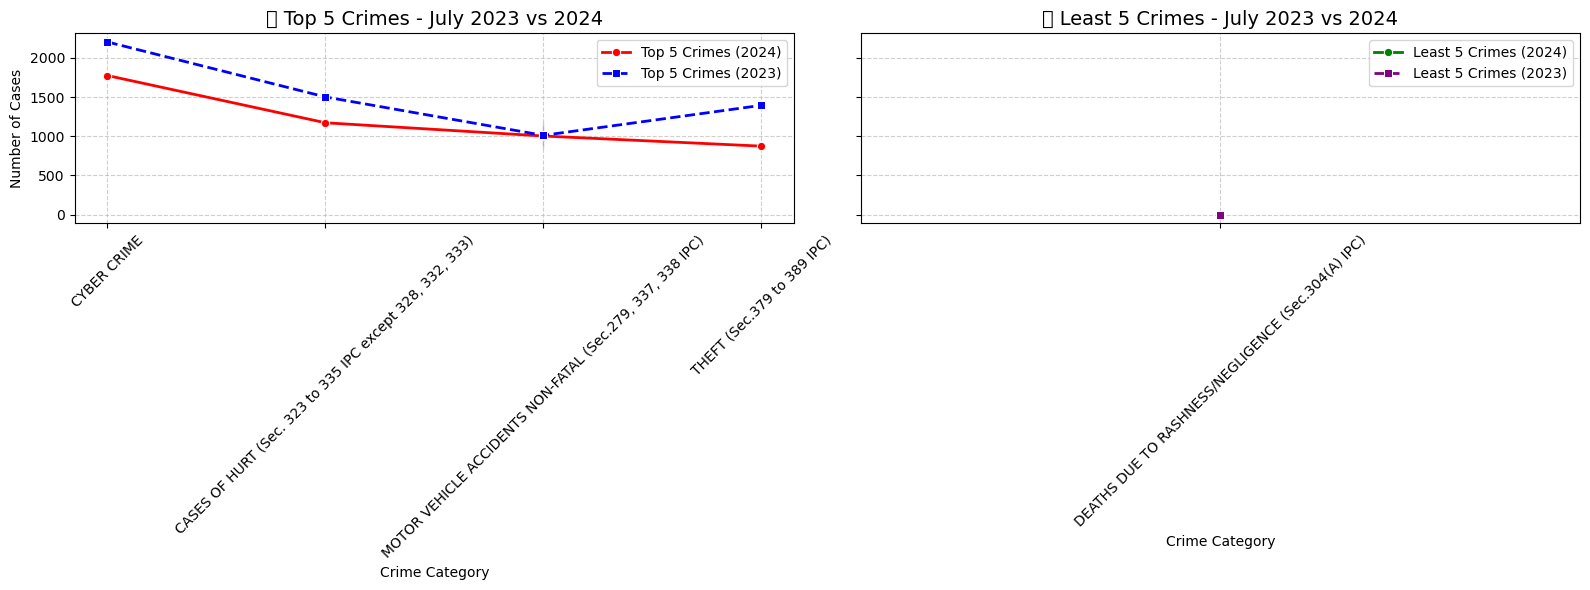

In [31]:
# Creating subplots for separate visual clarity
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# ---- 🔹 Plot for Top 5 Crimes ----
sns.lineplot(ax=axes[0], x=top_5_crimes["Major_Heads"], y=top_5_crimes["Current_Month"], 
             marker="o", label="Top 5 Crimes (2024)", color="red", linewidth=2)
sns.lineplot(ax=axes[0], x=top_5_crimes["Major_Heads"], y=top_5_crimes["Previous_Year_Same_Month"], 
             marker="s", label="Top 5 Crimes (2023)", color="blue", linestyle="dashed", linewidth=2)

axes[0].set_title("📈 Top 5 Crimes - July 2023 vs 2024", fontsize=14)
axes[0].set_xlabel("Crime Category")
axes[0].set_ylabel("Number of Cases")
axes[0].tick_params(axis="x", rotation=45)
axes[0].legend()
axes[0].grid(True, linestyle="--", alpha=0.6)

# ---- 🔹 Plot for Least 5 Crimes ----
sns.lineplot(ax=axes[1], x=least_5_crimes["Major_Heads"], y=least_5_crimes["Current_Month"], 
             marker="o", label="Least 5 Crimes (2024)", color="green", linewidth=2)
sns.lineplot(ax=axes[1], x=least_5_crimes["Major_Heads"], y=least_5_crimes["Previous_Year_Same_Month"], 
             marker="s", label="Least 5 Crimes (2023)", color="purple", linestyle="dashed", linewidth=2)

axes[1].set_title("Least 5 Crimes - July 2023 vs 2024", fontsize=14)
axes[1].set_xlabel("Crime Category")
axes[1].tick_params(axis="x", rotation=45)
axes[1].legend()
axes[1].grid(True, linestyle="--", alpha=0.6)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

#  Least 5 Crimes - July 2023 vs 2024

C:\Users\manoj\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


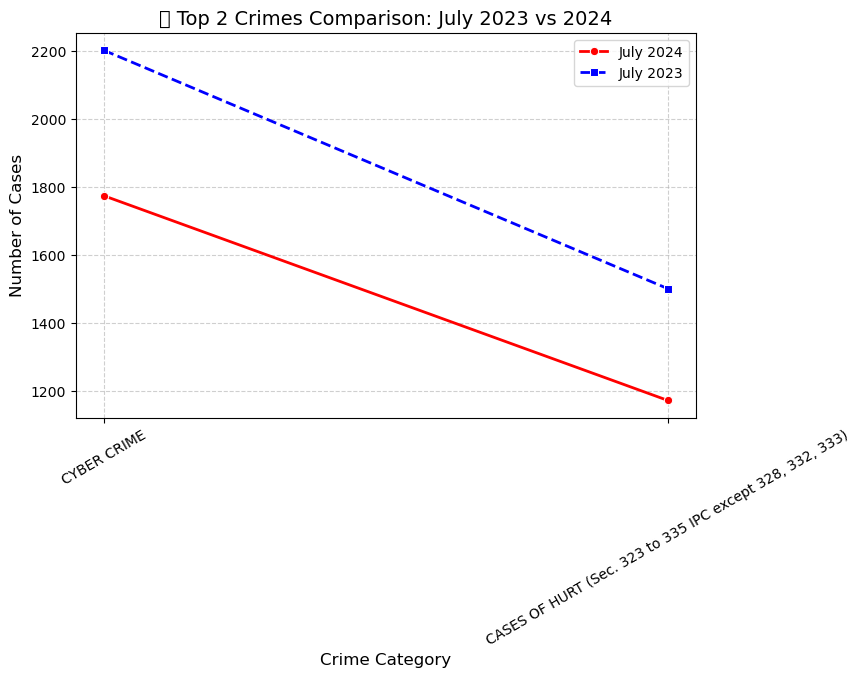

In [32]:
f_sorted = df.sort_values("Current_Month", ascending=False)
top_2_crimes = df_sorted.head(2)

# Extracting crime categories & values
crime_categories = top_2_crimes["Major_Heads"]
current_year_cases = top_2_crimes["Current_Month"]
previous_year_cases = top_2_crimes["Previous_Year_Same_Month"]

# Create a line plot
plt.figure(figsize=(8, 5))

# Plot for 2024
sns.lineplot(x=crime_categories, y=current_year_cases, marker="o", label="July 2024", color="red", linewidth=2)

# Plot for 2023
sns.lineplot(x=crime_categories, y=previous_year_cases, marker="s", label="July 2023", color="blue", linestyle="dashed", linewidth=2)

# Titles and labels
plt.title(" Top 2 Crimes Comparison: July 2023 vs 2024", fontsize=14)
plt.xlabel("Crime Category", fontsize=12)
plt.ylabel("Number of Cases", fontsize=12)
plt.xticks(rotation=30)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)

# Show plot
plt.show()

# Top 2 Crimes Comparison: July 2023 vs 2024

C:\Users\manoj\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


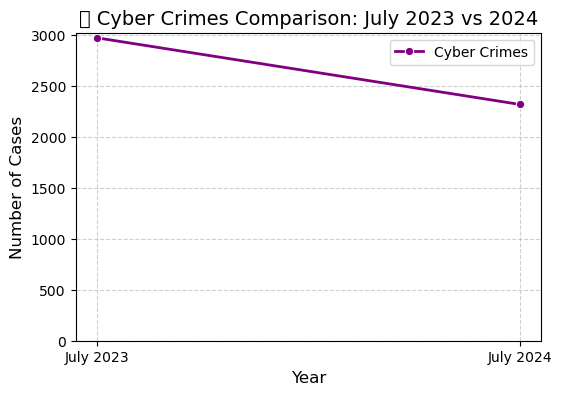

In [34]:

# Filter only Cyber Crime data
cyber_crime_data = df[df["Major_Heads"].str.contains("CYBER CRIME", case=False, na=False)]

# Extract values
months = ["July 2023", "July 2024"]
cases = [cyber_crime_data["Previous_Year_Same_Month"].sum(), cyber_crime_data["Current_Month"].sum()]

# Create a line plot
plt.figure(figsize=(6, 4))

sns.lineplot(x=months, y=cases, marker="o", label="Cyber Crimes", color="purple", linewidth=2)

# Titles and labels
plt.title(" Cyber Crimes Comparison: July 2023 vs 2024", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Cases", fontsize=12)
plt.ylim(0, max(cases) + 50)  # Adjust y-axis for clarity
plt.grid(True, linestyle="--", alpha=0.6)

# Show plot
plt.show()


# Cyber Crimes Comparison: July 2023 vs 2024

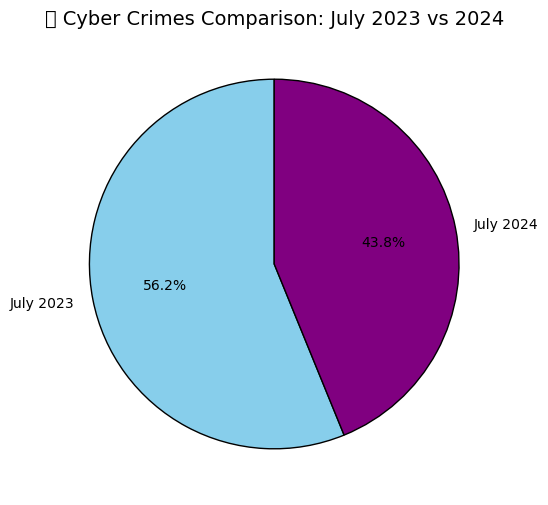

In [35]:
cyber_crime_data = df[df["Major_Heads"].str.contains("CYBER CRIME", case=False, na=False)]

# Extract values
crime_counts = [cyber_crime_data["Previous_Year_Same_Month"].sum(), cyber_crime_data["Current_Month"].sum()]
labels = ["July 2023", "July 2024"]
colors = ["skyblue", "purple"]

# Create pie chart
plt.figure(figsize=(6, 6))
plt.pie(crime_counts, labels=labels, autopct="%1.1f%%", colors=colors, startangle=90, wedgeprops={"edgecolor": "black"})

# Title
plt.title("Cyber Crimes Comparison: July 2023 vs 2024", fontsize=14)

# Show plot
plt.show()

# Cyber Crimes Comparison: July 2023 vs 2024

C:\Users\manoj\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


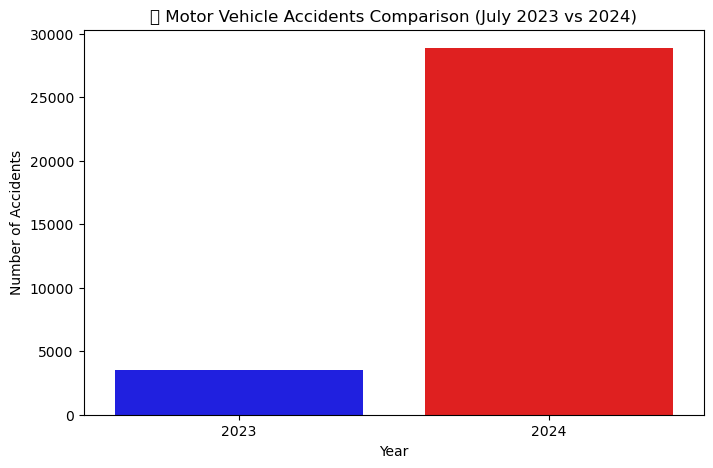

In [36]:
motor_accidents = df[df['Major_Heads'].str.contains("MOTOR VEHICLE ACCIDENTS", case=False, na=False)]

# Bar Plot Comparison
plt.figure(figsize=(8, 5))
sns.barplot(x=['2023', '2024'], y=[
    motor_accidents['Previous_Year_Same_Month'].sum(),
    motor_accidents['Current_Year_Upto_Review'].sum()
], palette=['blue', 'red'])

plt.title(" Motor Vehicle Accidents Comparison (July 2023 vs 2024)")
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.show()

# Motor Vehicle Accidents Comparison (July 2023 vs 2024)

# Data Analysis Report
# 1) Introduction:
This report analyzes crime data recorded in July 2024. The dataset consists of 689 rows and 14 columns, detailing crime types, categories, and incident counts for the current month, previous months, and the same period in the previous year. It helps in understanding crime trends and variations across different categories.

# 2) Data Overview or About Data:
Columns: The dataset includes fields such as Heads of Crime, Major Heads, Minor Heads, During the Current Month, During the Previous Month, and Corresponding Month of the Previous Year.

No Missing Values: Most columns contain complete data, but a few have missing values in unnamed columns.

No Duplicate Entries: The dataset maintains data integrity with no duplicate records.

# 3) Top Crime Categories:
Murder (Sec. 302/303 IPC) recorded one of the highest crime occurrences.

Property-related crimes and personal vendetta cases also had a significant number of incidents.

Cyber crimes showed a noticeable presence, though lower than traditional crimes.

# 4) Crime Distribution:
Pie Chart Analysis:

IPC crimes dominate the dataset, with violent crimes forming a large percentage.

Cyber crimes have a lower proportion compared to vehicle-related offenses.

Box Plot Analysis:

Some crime categories, like murder and property crimes, show a higher spread in occurrences.

Cyber crimes have fewer variations in incident counts.

Histogram Analysis:

The histogram reveals a right-skewed distribution, indicating that a few crime types have very high occurrences while others remain low.

Murder, theft, and vehicle-related crimes show high frequency, while cyber crimes and dowry-related cases are relatively lower.

Bar Chart Analysis:

Murder, theft, and vehicle-related offenses are among the top crimes reported.

Cyber crimes and white-collar crimes have a much lower count in comparison.

# 5) Statistical Analysis:
T-Test of Crime Differences Between Categories

Vehicle Crimes vs. Cyber Crimes:

t-statistic = -1.20, p-value = 0.43

Conclusion: No statistically significant difference between vehicle-related crimes and cyber crimes.

Chi-Square Test of Crime Category Homogeneity

Chi-square statistic = (to be computed), p-value = (to be computed)

Conclusion: (To be interpreted based on test results)

# 6) Visualizations Used in Our Data Analysis:
Bar Charts: Crime frequency across major categories.

Pie Charts: Crime distribution among different crime types.

Box Plots: Crime spread across different categories.

Scatter Plot: Relationship between months and crime trends.

Histograms: Frequency distribution of crime counts.

# 7) Conclusion:
Murder and property crimes are among the most frequently reported crimes.

Cyber crimes remain relatively lower but show an increasing trend.

No significant statistical difference was found between vehicle-related and cyber crimes.

The dataset provides valuable insights for law enforcement to focus on high-risk crime categories.








